In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

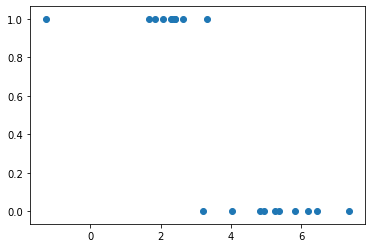

In [12]:
xlabel0=np.random.normal(5,1,10)     #np.append(np.random.normal(5,1,9),20)
xlabel1=np.random.normal(2,1,10)
labels=[0.]*len(xlabel0) +[1.]*len(xlabel1)
xs=np.append(xlabel0,xlabel1)

plt.scatter(xs,labels)
plt.show()

In [7]:
learning_rate=0.001
training_epoch=1000

X=tf.placeholder("float")
Y=tf.placeholder("float")

def model(X,w):
    return tf.add(tf.multiply(w[1],tf.pow(X,1)),tf.multiply(w[0],tf.pow(X,0)))

w=tf.Variable([0.,0.],name="parameters")

y_model=model(X,w)

cost=tf.reduce_sum(tf.square(Y-y_model))

train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

0 8.71384
100 2.717422
200 1.7673812
300 1.6146188
400 1.5900552
500 1.5861053
600 1.5854703
700 1.5853682
800 1.5853517
900 1.5853493
w values= [ 1.2404228  -0.20224468]


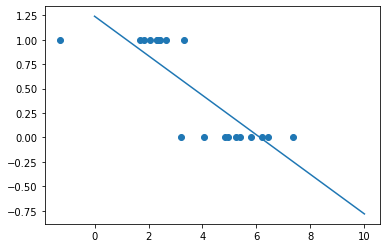

In [13]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epoch):
    sess.run(train_op,feed_dict={X:xs,Y:labels})
    current_cost=sess.run(cost,feed_dict={X:xs,Y:labels})
    
    if epoch%100==0:
        print(epoch,current_cost)

w_val=sess.run(w)
print("w values=",w_val)
sess.close()

plt.scatter(xs,labels)

all_xs=np.linspace(0,10,100)

plt.plot(all_xs,all_xs*w_val[1]+w_val[0])
plt.show()